In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
# Maquina de estados con probabilidades:
# 0 -> 1: 1/40
# 0 -> 0: 39/40
# i -> i + 1: 1/40 * 29/30 = 0.0242
# i + 1 -> i: 1/30 * 39/40 = 0.0325
# i -> i: 1/30 * 1/40 + 29/30 * 39/40 = 0.9433
# i >= 1

In [11]:
def transicion(estado_anterior, u):
    if estado_anterior == 0:
        if u < 1/40:
            return estado_anterior + 1
        return estado_anterior
    # else
    if u < 0.0242:
        return estado_anterior + 1
    elif u < 0.0242 + 0.0325:
        return estado_anterior - 1
    return estado_anterior

In [16]:
estado_actual = 0
estados = [estado_actual]
for _ in range(int(1000 / 0.01)):
    estado_actual = transicion(estado_actual, random.random())
    estados.append(estado_actual)

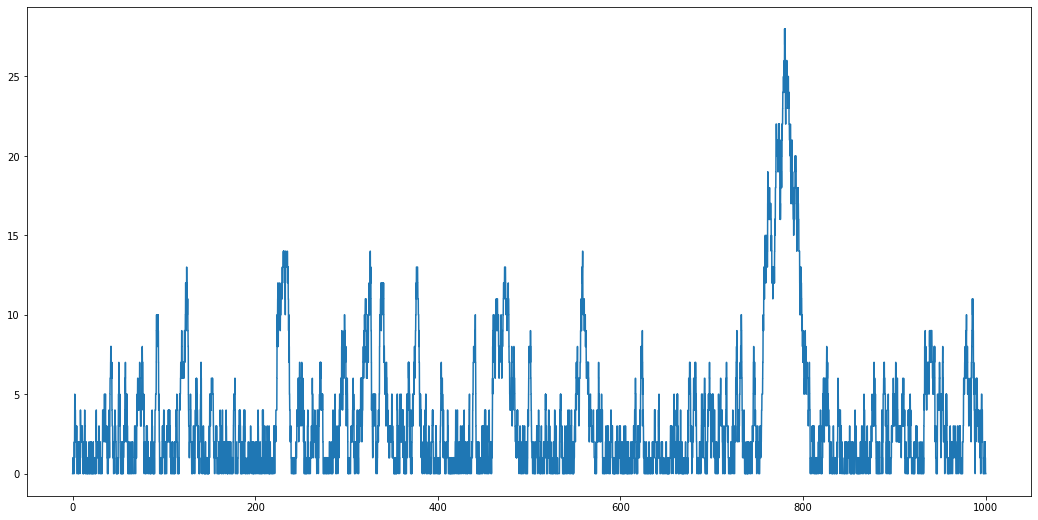

In [20]:
plt.figure(figsize=(18,9))
plt.plot(np.linspace(0, 1000, 100001), estados);

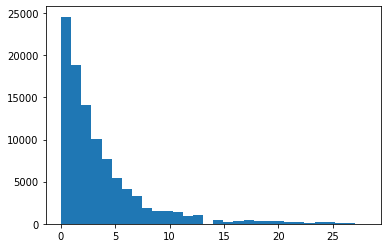

In [22]:
plt.hist(estados, bins=30);

In [23]:
25000/len(estados)

0.24999750002499976

In [24]:
def generar_matriz():
    matriz = [ [0 for _ in range(30)] for _ in range(30) ]
    for f in range(1, 29):
        matriz[f][f-1] = 1/30 * 39/40
        matriz[f][f] = 1/30 * 1/40 + 29/30 * 39/40
        matriz[f][f+1] = 1/40 * 29/30
    
    matriz[0][0] = 39/40
    matriz[0][1] = 1/40
    matriz[29][29] = 29/30
    matriz[29][28] = 1/30
    return matriz

In [33]:
print('\n'.join(map(lambda fila: ','.join(f'{e :.2f}' for e in fila), (fila for fila in generar_matriz()))))

0.97,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.03,0.94,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.00,0.03,0.94,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.00,0.00,0.03,0.94,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.00,0.00,0.00,0.03,0.94,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.00,0.00,0.00,0.00,0.03,0.94,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.00,0.00,0.00,0.00,0.00,0.03,0.94,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

In [36]:
[sum(fila) for fila in generar_matriz()]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [1]:
# Puntos de equilibrio: (0, 0, z), z real

In [2]:
def simular_sistema(semilla, iteraciones):
    resultado = [semilla]
    for _ in range(iteraciones):
        xa, ya, za = resultado[-1]
        x = (xa + 2*ya) / 2
        y = ya - xa / 2
        z = za - (xa + ya)
        resultado.append((x, y, z))
    return resultado

/tmp/ipykernel_18821/2965923673.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


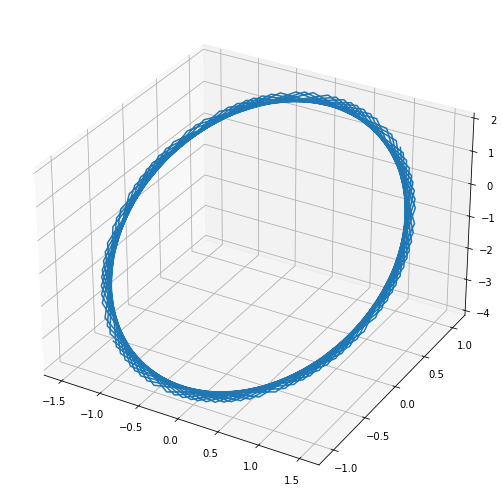

In [23]:
escenario_1 = simular_sistema((1, 1, 1), 100)

xx = [x for x, y, z in escenario_1]
yy = [y for x, y, z in escenario_1]
zz = [z for x, y, z in escenario_1]

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(18,9))
ax = fig.gca(projection='3d')
ax.plot(xx, yy, zz);